## Regularised Logistic regression

In [75]:
import numpy as np
import matplotlib.pyplot as plt

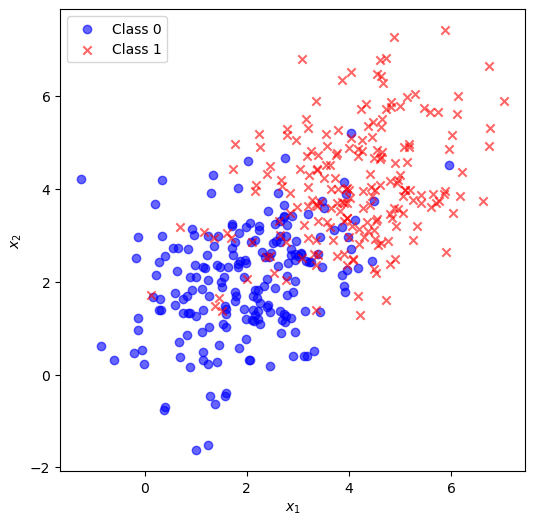

(200, 2)


In [76]:

np.random.seed(42)


x0 = np.random.multivariate_normal(mean=[2, 2], cov=[[1.5, 0.5], [0.5, 1.5]], size=200)
x1 = np.random.multivariate_normal(mean=[4, 4], cov=[[1.5, 0.5], [0.5, 1.5]], size=200)


X=np.vstack((x0,x1))
f1=X[:,0]
f2=X[:,1]
X_poly = np.c_[f1,f2,f1**2,f2**2,f1*f2,f1*(f2**2),f2*(f1**2)]
y = np.hstack((np.zeros(200), np.ones(200)))


plt.figure(figsize=(6,6))
plt.scatter(x0[:,0], x0[:,1], c='blue', marker='o', label="Class 0", alpha=0.6)
plt.scatter(x1[:,0], x1[:,1], c='red', marker='x', label="Class 1", alpha=0.6)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()
print(x1.shape)

#### Z-score Normalization.

In [77]:
X_mean=np.mean(X_poly,axis=0)
X_std=np.std(X_poly,axis=0)
X_train=(X_poly-X_mean)/X_std

#### Functions to calculate cost , Gradient and Gradient Descent

In [78]:
def compute_cost(x,y,w,b,L):
    m=x.shape[0]
    z=np.dot(x,w)+b
    f_wb=(1/(1+np.exp(-z)))
    y=y.reshape(-1,1)
    cost=(-1/m)*np.sum(y*np.log(f_wb)+(1-y)*np.log(1-f_wb)) +(L/(2*m))*np.sum(w**2)
    return cost

In [79]:
def compute_gradient(x,y,w,b,L):
    m=x.shape[0]
    z=np.dot(x,w)+b
    f_wb=(1/(1+np.exp(-z)))
    y=y.reshape(-1,1)
    dw=(1/m)*np.dot(x.T,f_wb-y)+(L/m)*w
    db=(1/m)*np.sum(f_wb-y)
    return dw,db


In [80]:
def compute_gradient_decent(x,y,w,b,L,lr,itr):
    m=x.shape[0]
    j_history=[]
    for i in range(itr):
        dw,db=compute_gradient(x,y,w,b,L)
        w=w-lr*dw
        b=b-lr*db
        cost=compute_cost(x,y,w,b,L)
        j_history.append(cost)
    return w,b,j_history


In [81]:
#intitial values of weights and bias
w=np.zeros((X_poly.shape[1],1))
b=0

#### Training the model over the generated dataset with standardized values

In [82]:
w,b,j_history=compute_gradient_decent(X_train,y,w,b,0.01,0.1,10000)

#### This code is creating decision boundary based on the values that the model predicted

In [83]:
x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1

x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1

xx1,xx2=np.meshgrid(
    np.linspace(x1_min,x1_max,200),
    np.linspace(x2_min,x2_max,200)
)

poly_grid=np.c_[
    xx1.ravel(), xx2.ravel(),
    xx1.ravel()**2, xx2.ravel()**2,
    xx1.ravel()*xx2.ravel(),
    xx1.ravel()*(xx2.ravel()**2),
    xx2.ravel()*(xx1.ravel()**2)
]

poly_grid_std=(poly_grid-X_mean)/X_std

z=np.dot(poly_grid_std,w)+b
z=z.reshape(xx1.shape)

#### Decision boundary visualization

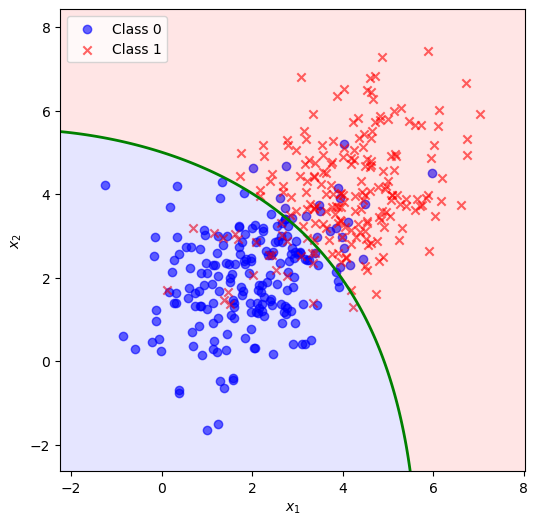

In [84]:
plt.figure(figsize=(6,6))
plt.scatter(x0[:,0], x0[:,1], c='blue', marker='o', label="Class 0", alpha=0.6)
plt.scatter(x1[:,0], x1[:,1], c='red', marker='x', label="Class 1", alpha=0.6)

plt.contour(xx1, xx2, z, levels=[0], colors='green', linewidths=2)
plt.contourf(xx1, xx2, z, levels=[-100, 0, 100], colors=['blue', 'red'], alpha=0.1)  
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

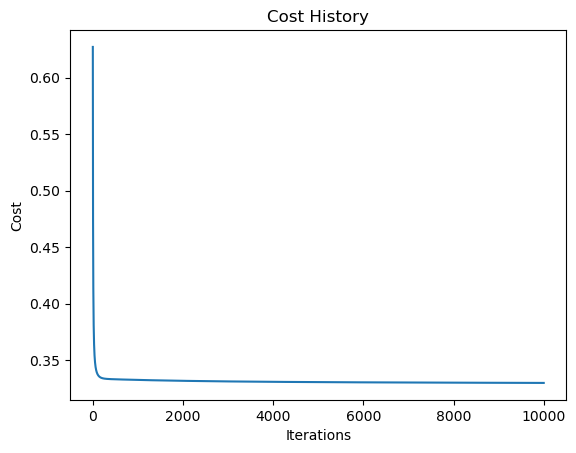

In [85]:
plt.plot(j_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')

plt.show()